<a href="https://colab.research.google.com/github/gusair/nyc_airbnb_analysis/blob/main/NYCAirbnb_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## New York x Airbnb: Insights on Hosting Trends and Guest Preferences

#### Introduction

New York City is arguably the most vibrant city in the world, attracting endless streams of visitors, tourists, dreamers, and residents. They all come seeking opportunities and unforgettable experiences in the city that never sleeps.

This unparalleled energy and allure make NYC a dense metropolis with thousands of accommodation options, ranging from iconic five-star hotels like The Plaza to free shared beds on platforms like Couchsurfing.

Travelers looking for affordable and less conventional options often turn to Airbnb. Founded in 2008 by three friends who initially rented out air mattresses in their apartment to design conference attendees, Airbnb has since sparked a revolution in global travel and hospitality.

As part of its commitment to transparency, Airbnb provides data about its operations in major cities worldwide through the [Inside Airbnb](https://insideairbnb.com/get-the-data.html) portal, which served as the foundation for this project.

In this notebook, we will analyze data related to New York City and uncover insights that can be extracted from these raw datasets.

<img src="https://images.contentstack.io/v3/assets/blt00454ccee8f8fe6b/bltea6f96696c15592e/605c0d011bcc840f22b1c819/US_Manhattan_US_Header.jpg?width=1920&quality=70&auto=webp">

## Data Acquisition


All the data used for this analysis is sourced from the [Inside Airbnb](https://insideairbnb.com/get-the-data.html) portal.
For this exploratory analysis, we used the following file: *`listings.csv` – Summary information and metrics for listings in New York City (good for visualisations)*.

In [1]:
# @title
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# @title
# import file listings.csv to a DataFrame
df = pd.read_csv("https://data.insideairbnb.com/united-states/ny/new-york-city/2024-09-04/visualisations/listings.csv")

## Data Analysis


### Dictionary of Variables

* `id` - unique identifier for the listing
* `name` - name of the listing
* `host_id` - unique identifier for the host
* `host_name` - name of the host
* `neighbourhood_group` - Broad geographic area or region where the listing is located
* `neighbourhood` - specific neighborhood where the listing is located
* `latitude` - latitude coordinate of the listing's location
* `longitude` - longitude coordinate of the listing's location
* `room_type` - type of room offered (e.g., entire home, private room, shared room)
* `price` - price per night for the listing
* `minimum_nights` - minimum number of nights required for booking
* `number_of_reviews` - total number of reviews for the listing
* `last_review` - date of the most recent review
* `reviews_per_month` - average number of reviews per month
* `calculated_host_listings_count` - total number of listings offered by the host
* `availability_365` - number of days the listing is available in a year
* `number_of_reviews_ltm"` - number of reviews received in the last 12 months
* `license`-  license number or permit ID for the listing, if applicable

## Getting to know our DataSet

In [3]:
# @title
# display the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1189243425411300671,The Grand III,61391963,Stay With Vibe,Manhattan,Murray Hill,40.750251,-73.977745,Entire home/apt,58.0,30,1,2024-08-02,0.86,130,357,1,NaN
1,651593916026998398,Cheerful one bedroom townhouse with backyard,136812643,Marah,Brooklyn,Flatlands,40.624760,-73.935560,Private room,80.0,30,0,NaN,NaN,1,365,0,NaN
2,310325,Large Sunny Bedroom with Bay Window,745069,Kimberly,Manhattan,Harlem,40.823590,-73.946010,Private room,75.0,30,31,2019-09-28,0.21,2,335,0,NaN
3,572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Joshua,Brooklyn,Sunset Park,40.639520,-74.014840,Private room,45.0,30,6,2024-07-30,0.21,2,336,1,NaN
4,1020282701018874374,Trendy Private Bedroom,483056418,Kristina,Brooklyn,Bedford-Stuyvesant,40.678946,-73.943759,Private room,47.0,30,0,NaN,NaN,24,269,0,NaN


### **How many attributes (variables) and entries does our dataset have? What are the types of the variables?**

The dataset contains a total of 37,541 entries across 18 variables. From the outset, we can observe that the last variable is not useful, as it contains almost no information and will therefore be disregarded.

##### Check the codes below:

In [4]:
# @title
# identify data volume of the DataFrame
print("Entries:\ {}".format(df.shape[0]))
print("Variables:\ {}".format(df.shape[1]))

# check first 5 entries of the dataset
display(df.dtypes)

Entries:\ 37541
Variables:\ 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **What is the percentage of missing values in the *dataset*?**

The quality of a dataset is directly related to the quantity of missing values. In this case, we can observe the following:

* As suspected earlier, the variable `license` has 85% missing values, making it irrelevant for our analysis.
* The variable `price` contains 39% missing values.
* Similarly, `last review` and `reviews per month` both have exactly 30.7% missing values.

In the latter case, there is an intrinsic correlation that resulted in the exact same number of missing values.

##### Check the codes below:

In [5]:
# @title
# sort the variables in descending order by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,0.857729
price,0.392930
last_review,0.307397
reviews_per_month,0.307397
host_name,0.000133
name,0.000053
host_id,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000


Double-checking the variables `last review` and `reviews per month`, we can confirm that their missing values are intrinsically linked, leading to identical quantities of missing data.

It's evident that the `reviews per month` are directly derived from calculations based on the `last review` variable.

In [6]:
# @title
df[['last_review', 'reviews_per_month']].isnull().sum()

,0
last_review,11540
reviews_per_month,11540


### **What is the type of distribution of the variables?**

To understand the distribution of the variables, we plot the following histograms.

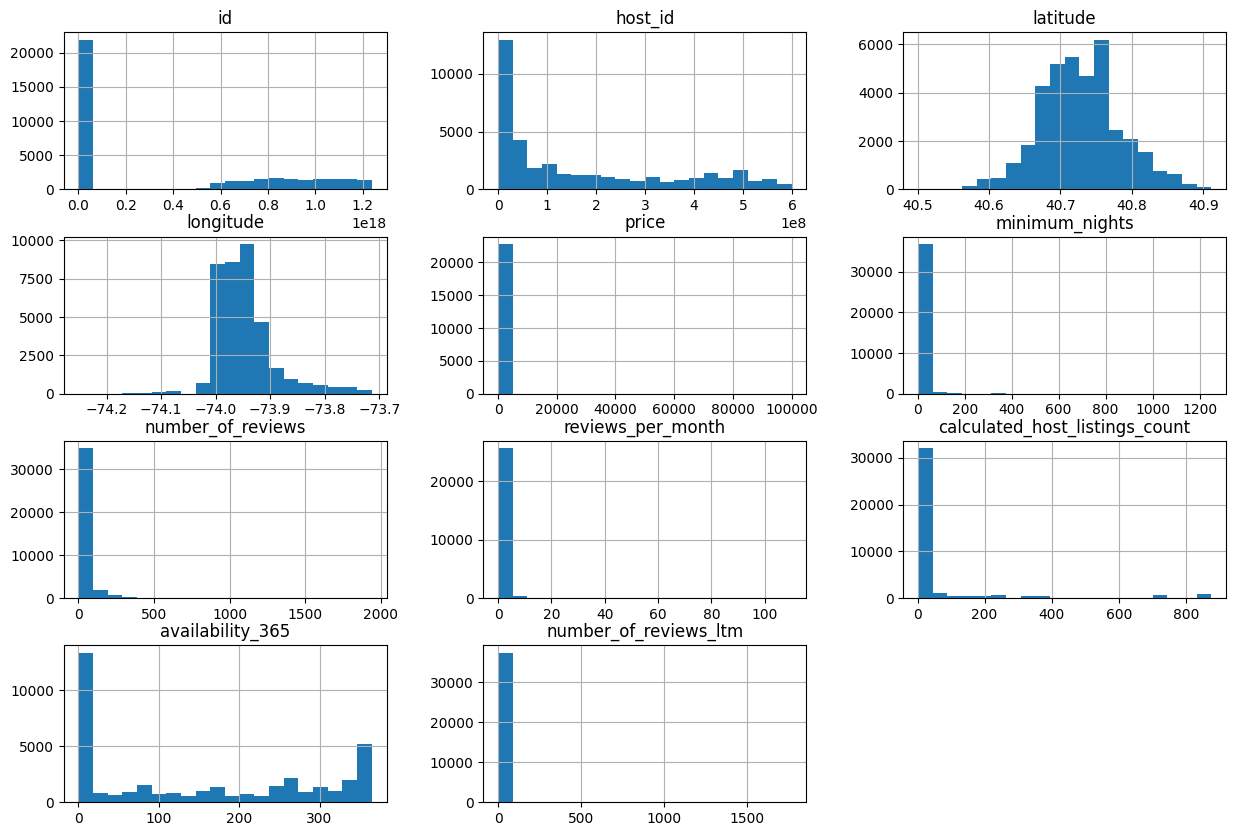

In [7]:
# @title
# plot the histogram of the numerical variables
df.hist(bins=20, figsize=(15,10));

### **Are there any outliers present?**

Looking at the histograms above, we can see outliers that disrupt our analysis, making it harder to interpret and less realistic.

For instance, take the minimum nights variable. There are small bars indicating values like 100, 200, and even 400 nights. It’s clear, using common sense, that it’s quite unusual for travelers to rent accommodations for such extended periods. Trips usually involve short-term stays, with mid-term durations being rare. Someone staying for more than six months isn’t really a traveler anymore—they're practically a resident.

Although not immediately obvious in the histogram, the price variable might also contain some outliers. We'll dive deeper into this in the next step of our analysis.


In [8]:
# @title
# check the statistical summary of the numerical variables.
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,22790.000000,37541.00000,37541.00000,26001.000000,37541.000000,37541.000000,37541.000000
mean,232.891795,28.98162,25.23449,0.892457,56.169974,152.796596,3.564450
std,1019.738134,30.70918,60.17222,1.864734,170.598777,142.535239,16.978104
min,8.000000,1.00000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,85.000000,30.00000,0.00000,0.090000,1.000000,0.000000,0.000000
50%,147.000000,30.00000,3.00000,0.320000,2.000000,128.000000,0.000000
75%,250.000000,30.00000,21.00000,1.070000,8.000000,294.000000,2.000000
max,100000.000000,1250.00000,1941.00000,110.100000,876.000000,365.000000,1772.000000


#### Boxplot for minimum_nights

Examining the boxplot below, we observe several outliers in the `minimum nights` variable. Since Airbnb is primarily designed for short-term stays, this raises an important question: how many bookings exceed 30 days? Let’s explore this in the analysis below.

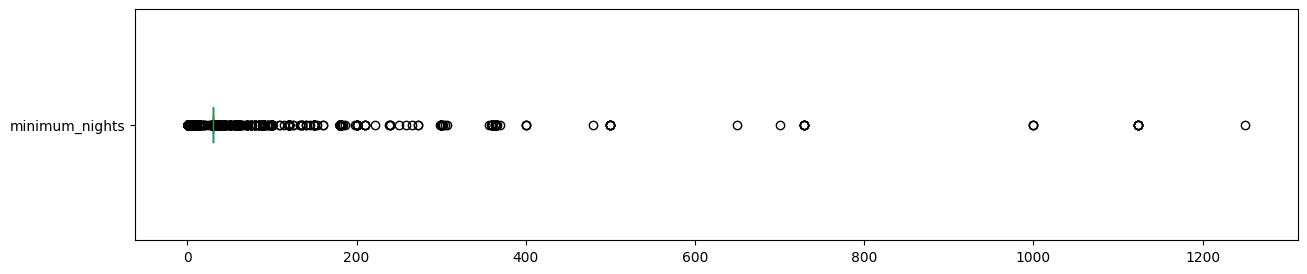

Values above 30 days:
2204 entries
5.8709%


In [9]:
# @title
# minimum nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# check the number of values above 30 days for minimum_nights
print("Values above 30 days:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

The number of stays exceeding 30 days is only minimally significant to our analysis. However, it reveals an interesting insight: in NYC, 5% of Airbnb users opt for mid-term stays, lasting over 30 days. This provides a glimpse into guest preferences.

While the reasons behind this trend are not the focus of our analysis, it could be attributed to NYC's unique characteristics. As a global metropolis, the city attracts professionals on temporary assignments, both from other states and abroad. Additionally, NYC is home to numerous universities and educational institutions, drawing a significant population of students who often fall into a category between tourists and residents.

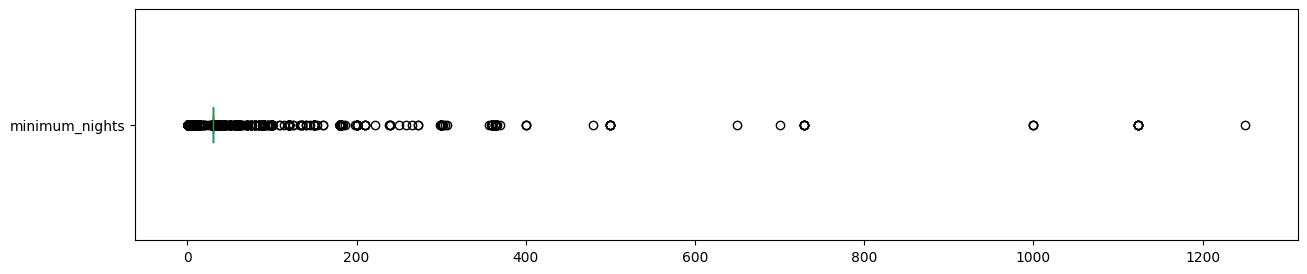

Values above 180 days:
157 entries
0.4182%


In [10]:
# @title
# minimum nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# check the number of values above 180 days for minimum_nights
print("Values above 180 days:")
print("{} entries".format(len(df[df.minimum_nights > 180])))
print("{:.4f}%".format((len(df[df.minimum_nights > 180]) / df.shape[0])*100))

Here, you can see that out of the 5.8% of non-short-term stays, only 0.4% are long-term stays (180+ days). Now we’ve identified our outliers, which could mess with our results.

Only 157 entries out of 37,541 fall into this category. It’s really hard to imagine an Airbnb guest staying for over 1,200 days—more than 3 years and 4 months! At that point, it would probably be easier to get a mortgage.

The next steps here will be to clean up these entries and disregard them in our analysis.

#### Boxplot for price

Now consider the price variable, where we see values reaching USD20,000 for a single night. While it’s true that extravagant hotel suites like The Penthouse Suite at The Mark Hotel in NYC can cost that much, this isn’t typical on Airbnb. The platform is known for offering reasonably priced, convenient booking options. These extreme cases skew the data and don’t align with what most people expect from Airbnb.

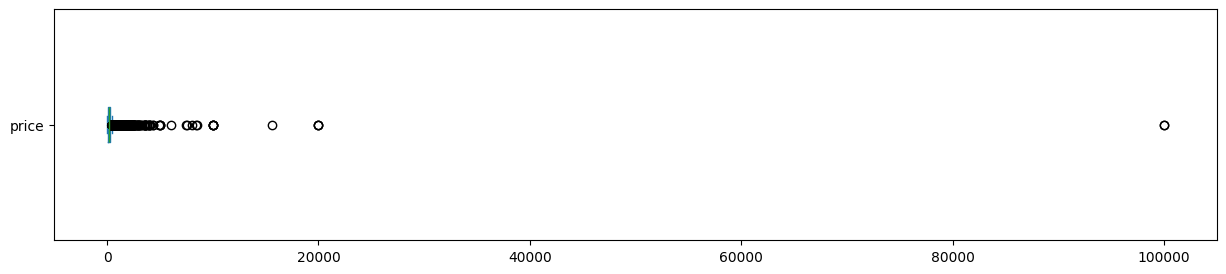

Values above $1000
333 entries
0.8870%


In [11]:
# @title
# price
df.price.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# check the number of values above 1000 for price
print("Values above $1000")
print("{} entries".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

In this case, we identify all values above USD1,000, which represent less than 1% of the entries in the price variable. Some bookings even reach USD20,000, with a peak at USD100,000.

These values above USD 1,000 are clear outliers and will be cleaned from the dataset. For this analysis, we consider values up to USD1,000 as reasonable, aligning with the average hotel prices in New York City.

### Histograms without outliers

Now you can check the histogram without the outliers.

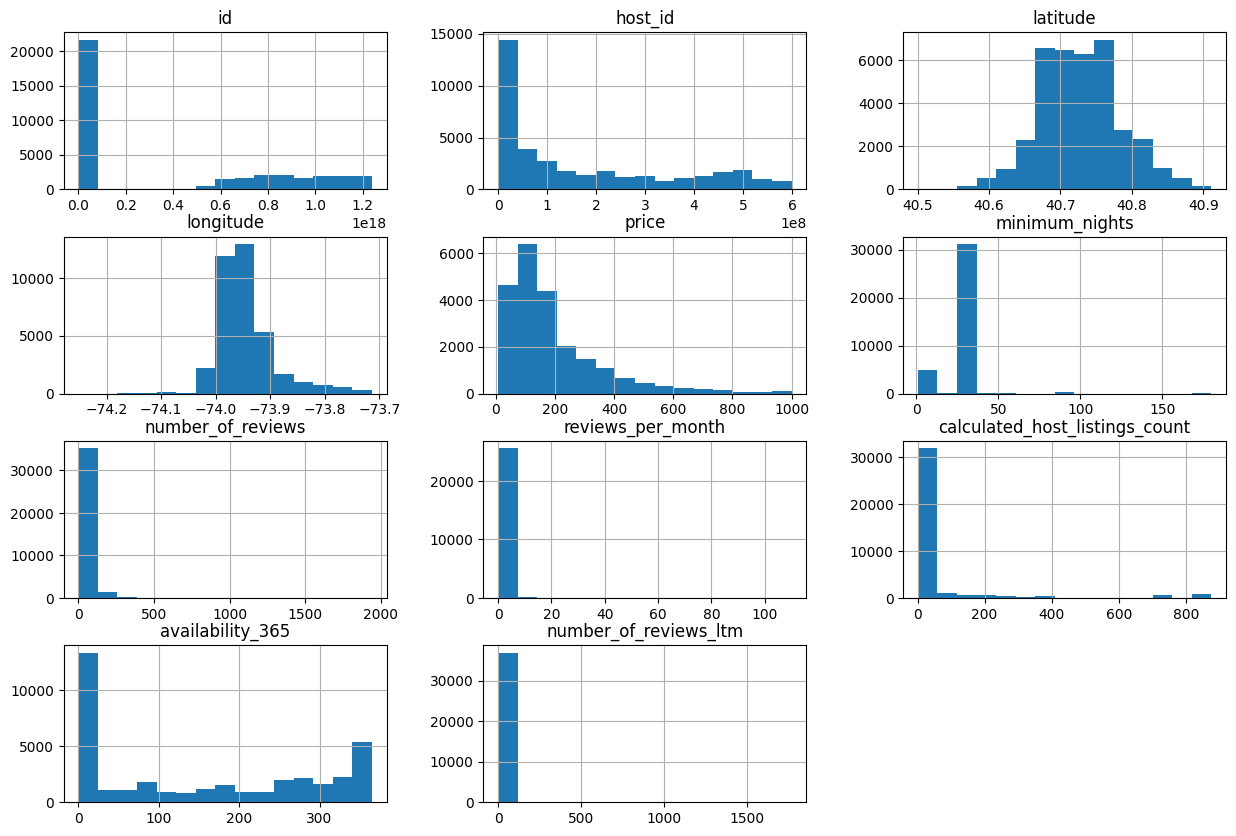

In [12]:
# @title
# remove the outliers in a new DataFrame.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 180].index, axis=0, inplace=True)

# remove `license`, it is empty
df_clean.drop('license', axis=1, inplace=True)

# plot histogram for the cleaned variables
df_clean.hist(bins=15, figsize=(15, 10));

In [13]:
# @title
# check the statistical summary of the numerical variables.
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,22401.000000,37051.000000,37051.000000,25746.000000,37051.000000,37051.000000,37051.000000
mean,195.487478,27.524682,25.385172,0.893799,56.360260,151.709670,3.585625
std,167.062001,14.431522,60.433940,1.871250,171.092814,142.300621,17.074386
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,83.000000,30.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,145.000000,30.000000,3.000000,0.320000,2.000000,126.000000,0.000000
75%,250.000000,30.000000,22.000000,1.070000,8.000000,291.000000,2.000000
max,1000.000000,180.000000,1941.000000,110.100000,876.000000,365.000000,1772.000000


### **What is the correlation between the variables?**

Check out correlation matrix.

In [14]:
# @title
# create a correlation matrix.
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# display the correlation matrix.
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.214564,-0.041544,0.089879,0.166562,0.042209
minimum_nights,-0.214564,1.000000,-0.161316,-0.339471,0.084312,-0.033467
number_of_reviews,-0.041544,-0.161316,1.000000,0.608997,-0.124734,0.070123
reviews_per_month,0.089879,-0.339471,0.608997,1.000000,-0.058542,0.141572
calculated_host_listings_count,0.166562,0.084312,-0.124734,-0.058542,1.000000,0.220313
availability_365,0.042209,-0.033467,0.070123,0.141572,0.220313,1.000000


Checkout heatmap for the correlations.

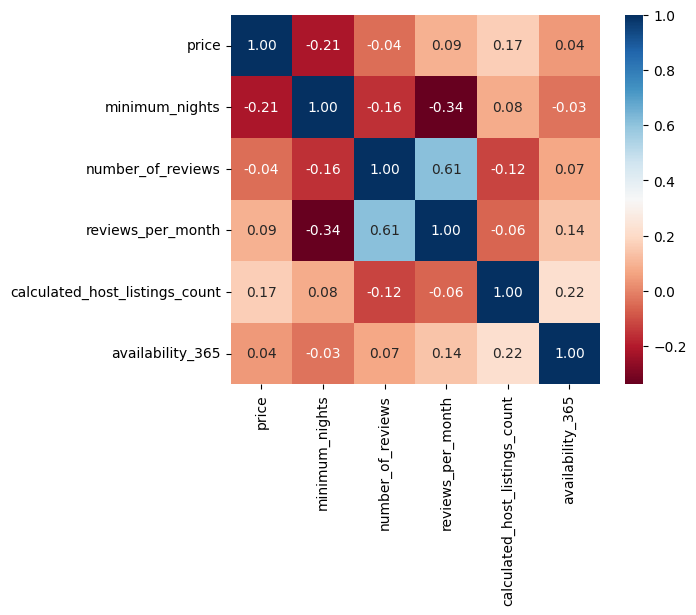

In [15]:
# @title
# plot a heatmap from the correlations.
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Observation on Correlations:

* Most relationships between variables are weak, indicating low correlation with their performance.

* The strongest correlation is observed between the number of reviews and reviews per month, reflecting the activity and popularity dynamics of listings.

* Price appears to be largely independent of most factors in this dataset, with only a weak correlation to minimum nights and calculated host listings count.

### **What is the most rented type of property on Airbnb in New York City?**

The most rented accommodation type is entire homes, representing 52%, followed by private rooms at 44%. Hotel rooms and shared rooms are both around 1%.

This confirms the premise of Airbnb: hosts rent out their entire apartments or a room within their apartments. Renting or sharing a room is not very common on this platform due to the lack of privacy. Hotel rooms are also not part of Airbnb's core idea, as the platform aims to compete with hotels by making booking easier and more affordable.

Check tables below:

In [16]:
# @title
# show the quantity of each type of property available
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,19574
Private room,16537
Hotel room,526
Shared room,414


In [17]:
# @title
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.528299
Private room,0.446331
Hotel room,0.014197
Shared room,0.011174


### **What is the most expensive location in the New York City?**



Not surprisingly, the most expensive borough in New York City is Manhattan, with an average price of USD259. It is followed by Brooklyn at USD160, Queens at USD126, Staten Island at USD122, and finally, the Bronx with an average price of USD118.


Check codes below:

In [18]:
# @title
# view prices by boroughs, on average
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood_group,
Manhattan,259.582239
Brooklyn,160.084363
Queens,126.562483
Staten Island,122.550955
Bronx,118.242286


Now, let’s take a look at the most expensive neighborhoods.

In [19]:
# @title
# view prices by neighbourhoods, on average
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Rossville,840.000000
Fort Wadsworth,600.000000
NoHo,449.666667
SoHo,438.751880
Tribeca,434.148438
Battery Park City,428.333333
Greenwich Village,398.933333
Civic Center,390.800000
Financial District,373.440111


In [20]:
# @title
# view prices by neighbourhoods and their respective boroughs
df_clean.groupby(['neighbourhood','neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

,,price
neighbourhood,neighbourhood_group,
Rossville,Staten Island,840.000000
Fort Wadsworth,Staten Island,600.000000
NoHo,Manhattan,449.666667
SoHo,Manhattan,438.751880
Tribeca,Manhattan,434.148438
Battery Park City,Manhattan,428.333333
Greenwich Village,Manhattan,398.933333
Civic Center,Manhattan,390.800000
Financial District,Manhattan,373.440111


In terms of neighbourhoods, we have a surprise: the most expensive neighborhood is not in Manhattan, which goes against both our prior analysis and common expectations.

This could indicate the presence of outliers, as common sense and an analysis of other aspects of our dataset show that Fort Wadsworth and Rossville, both in Staten Island, are not the most expensive or most popular neighborhoods in New York City.

To check this, let’s take a look at how many properties these two neighborhoods have on Airbnb. For comparison, we’ll also look at the third, fourth, and fifth neighborhoods on the list.

See table of properties in Fort Wadsworth.

In [21]:
# @title
# See the number of properties in Fort Wadsworth
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# See the entries from Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
16101,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,600.0,30,0,NaN,NaN,3,365,0


See table of properties in Rossville.

In [22]:
# @title
# See the number of properties in Rossville
print(df_clean[df_clean.neighbourhood == "Rossville"].shape)

# See the entries from Fort Wadsworth
df_clean[df_clean.neighbourhood == "Rossville"]

(1, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
19274,952984142614272420,Luxury Private Guest Suite King Bed,97940847,Vadim,Staten Island,Rossville,40.545464,-74.196363,Entire home/apt,840.0,30,0,NaN,NaN,1,270,0


See table of properties in NoHo.

In [24]:
# @title
# checking code
print(df_clean[df_clean.neighbourhood == "NoHo"].shape)
df_clean[df_clean.neighbourhood == "NoHo"]

(26, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1438,16353257,Quiet and cozy apartment in Greenwich Village,27932675,Sandra,Manhattan,NoHo,40.726050,-73.995760,Entire home/apt,NaN,30,3,2017-03-17,0.03,1,0,0
1899,714678465236240396,Great Jones Loft | Noho 3BR with Private Terrace,17649482,Haus,Manhattan,NoHo,40.725760,-73.993020,Entire home/apt,664.0,30,1,2023-10-13,0.09,4,244,1
2503,9669305,Mid Nolita Soho Lit. Italy Village,49967558,Joao,Manhattan,NoHo,40.725060,-73.994820,Entire home/apt,NaN,30,3,2016-01-01,0.03,1,0,0
2590,29453268,East Village Sublet multi month please,221853540,Kirt,Manhattan,NoHo,40.728980,-73.991040,Entire home/apt,NaN,31,0,NaN,NaN,1,0,0
4528,49863599,"Modern Luxe Loft, Housekeeping & Doorman",10388850,David,Manhattan,NoHo,40.728310,-73.993440,Entire home/apt,299.0,40,1,2022-11-18,0.05,1,363,0
6285,2094213,Large Stylish 1.5 BR Noho/Nolita,10642609,Laura,Manhattan,NoHo,40.725760,-73.992040,Entire home/apt,NaN,30,8,2017-01-02,0.06,1,0,0
6570,21410257,ALL YOURS FULL APARTMENT\n2 BDM 2 BTH East Vil...,27636450,Lauren,Manhattan,NoHo,40.727570,-73.991540,Entire home/apt,NaN,30,2,2017-11-06,0.02,2,0,0
6705,6747685,Beautiful Classic Bond Street NoHo Loft,29769754,Tom,Manhattan,NoHo,40.727840,-73.994280,Entire home/apt,725.0,30,120,2022-10-13,1.08,1,323,0
11411,19094558,Comfort & Convenience in Greenwich Village,23821111,Peter,Manhattan,NoHo,40.729230,-73.992420,Private room,NaN,30,0,NaN,NaN,1,0,0
14132,18358343,Private room in the perfect location,127080012,Thor,Manhattan,NoHo,40.724640,-73.993720,Private room,NaN,30,25,2018-04-30,0.28,2,0,0


See table of properties in Soho.

In [25]:
# @title
# checking code
print(df_clean[df_clean.neighbourhood == "SoHo"].shape)
df_clean[df_clean.neighbourhood == "SoHo"]

(240, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
109,748537688760859905,Chic one bedroom apartment in Soho,256632041,Kaitlin,Manhattan,SoHo,40.725730,-74.002180,Entire home/apt,180.0,30,1,2022-11-10,0.05,1,304,0
145,1174664876231706501,Soho 1-bedroom | stylish,582250822,Monty,Manhattan,SoHo,40.727459,-74.009056,Entire home/apt,600.0,30,0,NaN,NaN,1,364,0
258,6775098,Soho/West Village 1 bedroom apt,23985505,Liz,Manhattan,SoHo,40.726560,-74.002530,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0
481,1886240,June 30 Th to August 31 st,9813233,Tao,Manhattan,SoHo,40.725590,-74.000930,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0
614,10824871,Beautiful Jr 1 Br In SoHo,12485770,Raanan,Manhattan,SoHo,40.725440,-74.002970,Entire home/apt,120.0,30,7,2023-07-29,0.07,6,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36515,34071700,Courtyard Queen ADA,257995608,Arlo SoHo,Manhattan,SoHo,40.724400,-74.007940,Hotel room,NaN,1,48,2021-12-05,0.79,9,0,0
36517,34071692,Two Twin Room,257995608,Arlo SoHo,Manhattan,SoHo,40.724400,-74.007940,Hotel room,NaN,1,234,2023-07-24,4.29,9,0,0
36518,34071693,Two Twin Room - Terrace,257995608,Arlo SoHo,Manhattan,SoHo,40.724400,-74.007940,Hotel room,NaN,1,13,2021-06-19,0.24,9,0,0
36756,34071691,City Queen,257995608,Arlo SoHo,Manhattan,SoHo,40.724400,-74.007940,Hotel room,NaN,1,591,2023-11-26,9.79,9,0,1


See table of properties in Tribeca.

In [26]:
# @title
# checking code
print(df_clean[df_clean.neighbourhood == "Tribeca"].shape)
df_clean[df_clean.neighbourhood == "Tribeca"]

(182, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
296,23005685,Luxury Tribeca,51536620,Rafaela,Manhattan,Tribeca,40.71379,-74.01092,Private room,NaN,30,0,NaN,NaN,1,0,0
459,654726207711039975,Cozy Luxury Retro Aesthetic Bedroom,94689282,Ron Jacob,Manhattan,Tribeca,40.71969,-74.00610,Private room,NaN,30,0,NaN,NaN,1,364,0
726,35574095,Chic Tribeca Listing,7258900,Jill,Manhattan,Tribeca,40.71446,-74.00826,Private room,NaN,30,1,2019-06-14,0.02,1,0,0
741,2425871,Newly Built Full Bedroom In TriBeCa,12399023,Ankush,Manhattan,Tribeca,40.71590,-74.00834,Private room,NaN,30,0,NaN,NaN,1,0,0
1127,52654519,Tribeca/Soho Garden Apartment,2011516,David & Elise,Manhattan,Tribeca,40.71912,-74.01198,Entire home/apt,389.0,30,38,2024-07-19,1.13,1,288,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35887,28684892,"Blueground | Tribeca, great views & indoor pool",107434423,Blueground,Manhattan,Tribeca,40.71579,-74.00587,Entire home/apt,456.0,31,0,NaN,NaN,876,190,0
36090,19404818,Bright Quiet Airy Tribeca Loft,374115,Victoria,Manhattan,Tribeca,40.72270,-74.00856,Entire home/apt,NaN,30,8,2019-09-02,0.09,1,0,0
36335,22203739,LeonardLoft,15969987,Daniela,Manhattan,Tribeca,40.71650,-74.00566,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0
36790,36307882,Adorable TriBeCa neighborhood easy subway access!,111768943,Kristin,Manhattan,Tribeca,40.71892,-74.00796,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0


As suspected, the top two neighborhoods on the list are outliers. They don’t represent the true characteristics of higher average price locations, as both have only one property available.

In this case, they should be disregarded, and our list of the most expensive neighborhoods is as follows:

In [27]:
# @title
# New list of neighbourhoods, cleaning up the top two

df_clean[~df_clean['neighbourhood'].isin(['Fort Wadsworth', 'Rossville'])].groupby(['neighbourhood', 'neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

,,price
neighbourhood,neighbourhood_group,
NoHo,Manhattan,449.666667
SoHo,Manhattan,438.751880
Tribeca,Manhattan,434.148438
Battery Park City,Manhattan,428.333333
Greenwich Village,Manhattan,398.933333
Civic Center,Manhattan,390.800000
Financial District,Manhattan,373.440111
Vinegar Hill,Brooklyn,362.923077
Theater District,Manhattan,354.583916


The top three most expensive neighborhoods in New York City are NoHo, with an average price of USD449, SoHo at USD438, and Tribeca at USD434.

Here, you can see a visual representation of property distribution in New York City. The colors indicate the price ranges. It’s evident that prices follow a consistent pattern across the city, with only a few peaks of high-priced properties, most of which are concentrated in Manhattan.

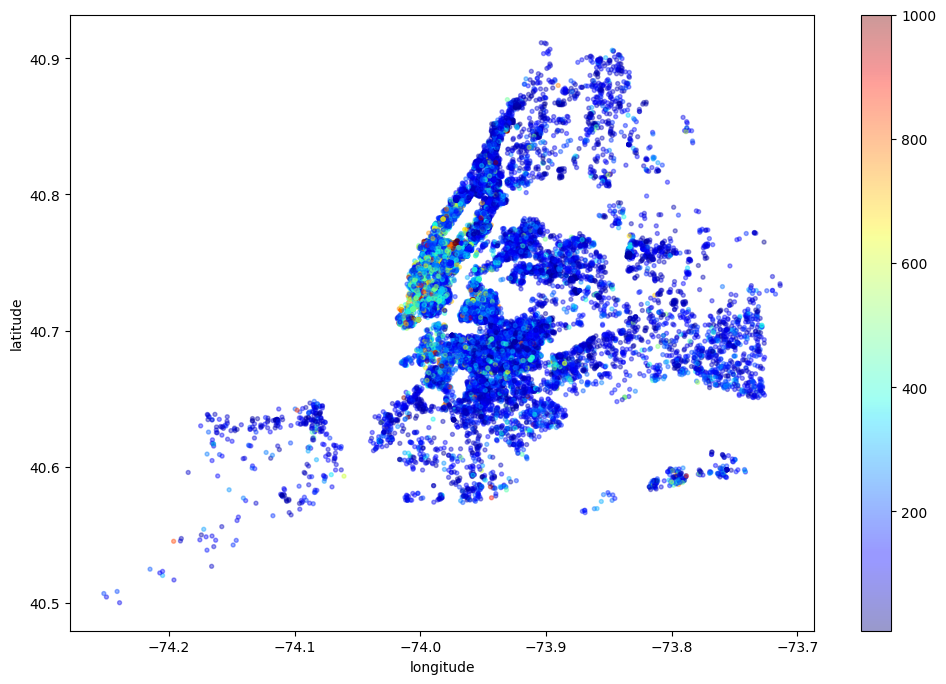

In [28]:
# @title
# plot the properties by latitude and longitude.
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusions


The analysis conducted was relatively straightforward and without major complexities. However, it still provided valuable insights into hosting trends and guest preferences in New York City. Additionally, it offered an interesting perspective on pricing patterns across the city's neighborhoods and boroughs.

The existence of boroughs in NYC made the location analysis slightly more challenging. Nevertheless, our findings aligned with common sense and popular knowledge: Manhattan is the most expensive borough in NYC, with neighborhoods like NoHo, SoHo, and Tribeca significantly driving up prices. Other notable areas, such as the Financial District, also contribute to Manhattan's high costs.

In New York City, the average minimum stay is surprisingly high, reaching 28 days. From a tourism perspective, this number is quite unusual, suggesting that many visitors use Airbnb for mid-term stays—likely for work trips or educational purposes.

As for accommodation types, the most rented options align with Airbnb's core offerings, with entire apartments and private rooms accounting for nearly 98% of listings.

This concludes our analysis of Airbnb's presence in New York City for 2024.
